In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
heart_data=pd.read_csv("heart.csv")

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#number of rows and column in the dataset
heart_data.shape

(1025, 14)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


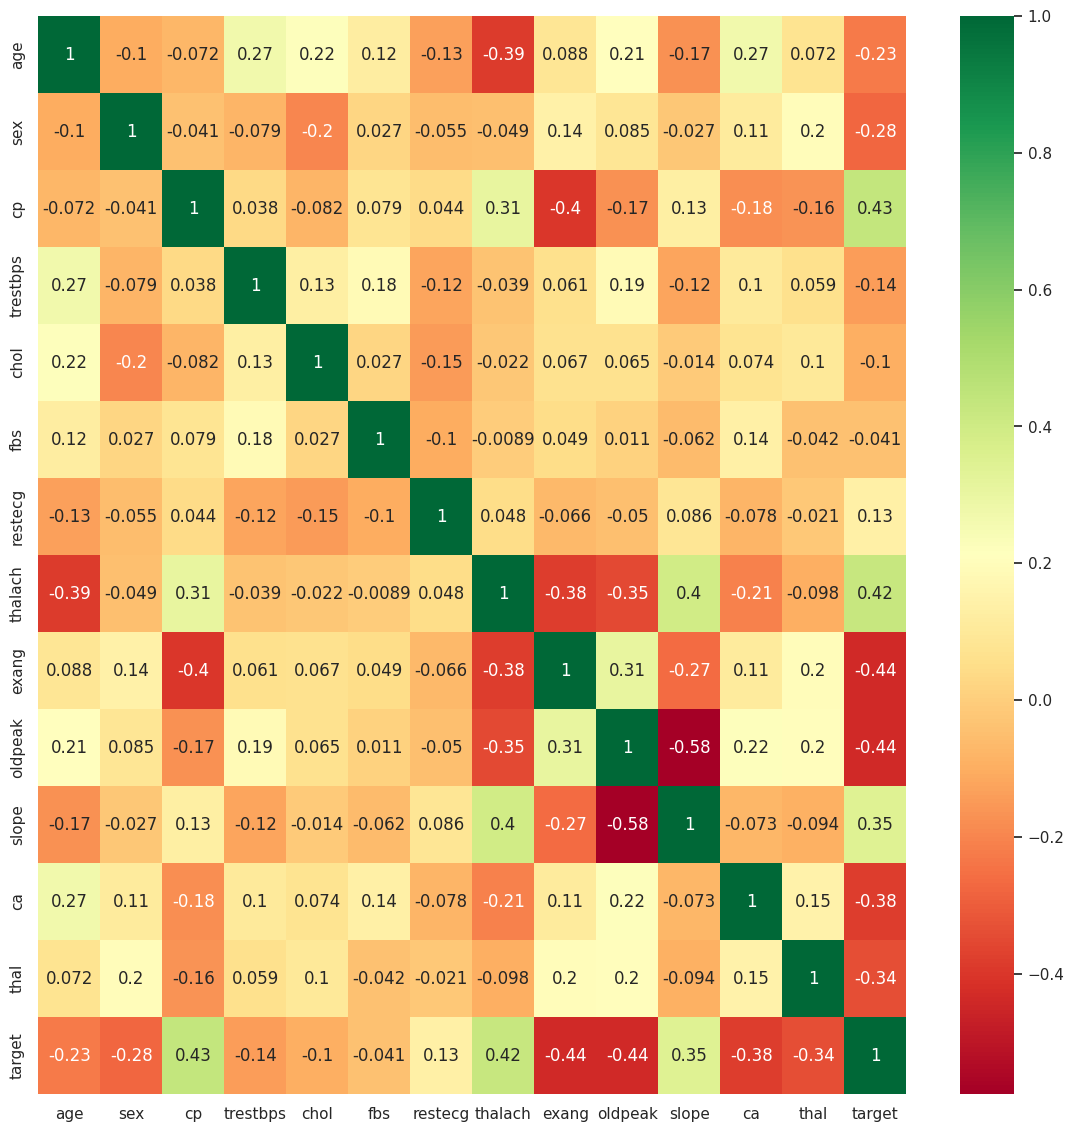

In [ ]:

corrmat=heart_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,14))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

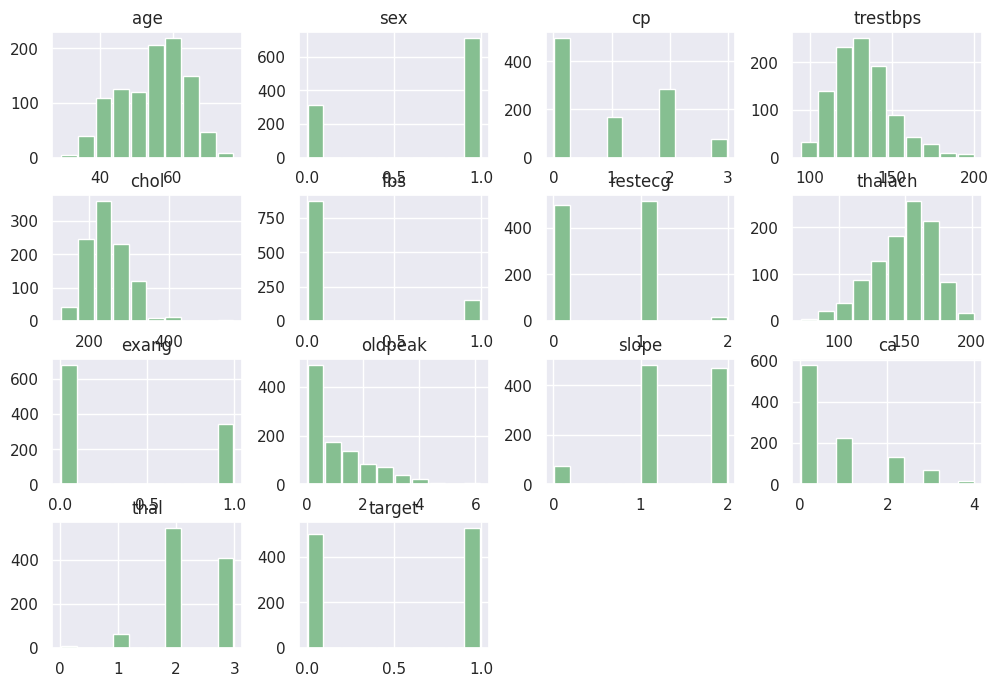

In [ ]:
heart_data.hist(figsize=(12,8) ,color='#86bf91', zorder=2, rwidth=0.9)

<ipython-input-157-b58b6b11e2b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['age'])


<Axes: xlabel='age', ylabel='Density'>

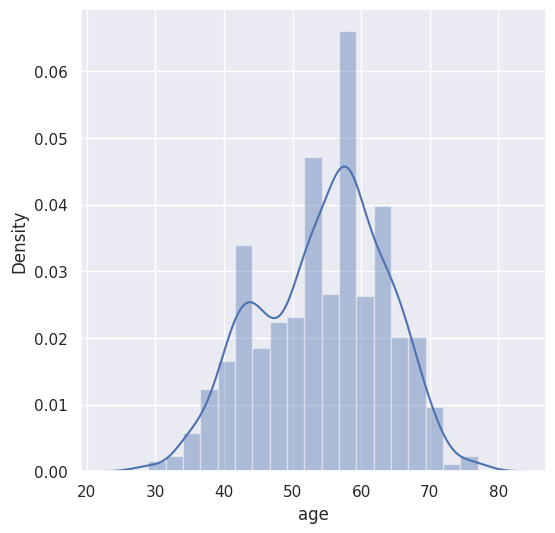

In [ ]:
sns.distplot(heart_data['age'])

<ipython-input-158-5e9d3397dbec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['trestbps'])


<Axes: xlabel='trestbps', ylabel='Density'>

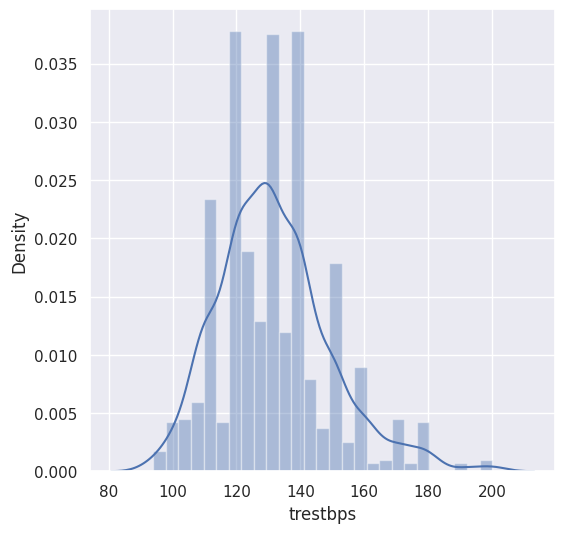

In [ ]:
sns.distplot(heart_data['trestbps'])

<ipython-input-159-c1822589e199>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female','Male'])


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

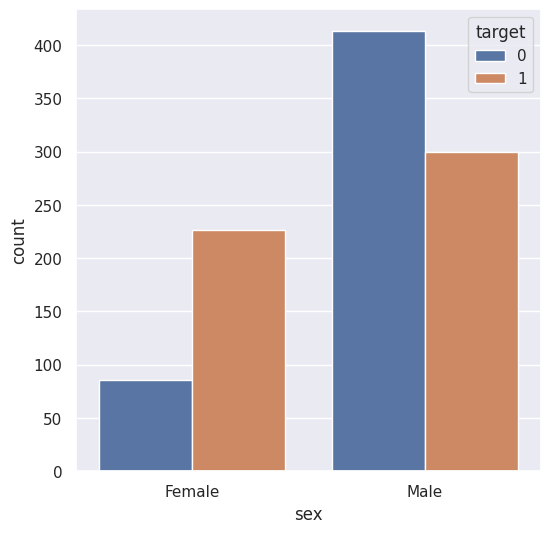

In [ ]:
ax=sns.countplot(data=heart_data, x='sex', hue='target')
ax.set_xticklabels(['Female','Male'])

In [ ]:
heart_data.groupby(['sex','target'])['sex'].count()

sex  target
0    0          86
     1         226
1    0         413
     1         300
Name: sex, dtype: int64

<ipython-input-161-8025ebf11cde>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=heart_data,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

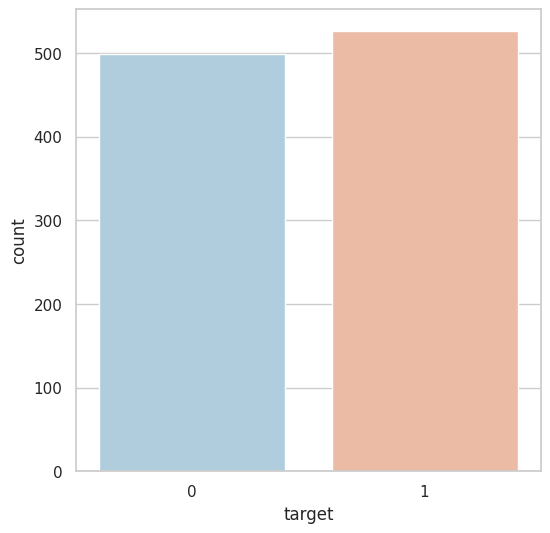

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data,palette='RdBu_r')

In [ ]:
#checking the distribution of target variable
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
#splitting the features and target
X =heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
#splitting the features and target
X =heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

data split - 70:30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (717, 13)
train_set_y shape: (717,)
test_set_x shape: (308, 13)
test_set_y shape: (308,)


In [ ]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

In [ ]:
#Logistic Regression

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.63%
Test accuracy: 83.12%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

[1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 1 1 1 1 0 1]
The accuracy score achieved using Logistic Regression is: 83.12 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_lr)
print("Precision: ",precision)

Precision:  0.7831325301204819


In [ ]:
# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_lr)
print("Recall is: ",recall)

Recall is:  0.8904109589041096


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.8333333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print("Accuracy:",accuracy_score(y_test, y_pred_lr))

[[126  36]
 [ 16 130]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       162
           1       0.78      0.89      0.83       146

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308

Accuracy: 0.8311688311688312


<Axes: >

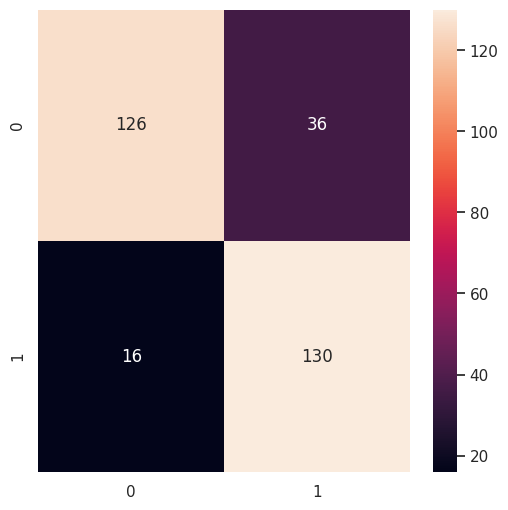

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#Knn

In [ ]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 100.00%
n_neigbors = 2
Train accuracy: 98.61%
Test accuracy: 93.51%
n_neigbors = 3
Train accuracy: 97.21%
Test accuracy: 85.06%
n_neigbors = 4
Train accuracy: 90.79%
Test accuracy: 76.95%
n_neigbors = 5
Train accuracy: 86.75%
Test accuracy: 69.81%
n_neigbors = 6
Train accuracy: 79.50%
Test accuracy: 71.10%
n_neigbors = 7
Train accuracy: 78.52%
Test accuracy: 72.08%
n_neigbors = 8
Train accuracy: 78.10%
Test accuracy: 72.08%
n_neigbors = 9
Train accuracy: 78.94%
Test accuracy: 72.40%


In [ ]:
model=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.935064935064935


<Axes: >

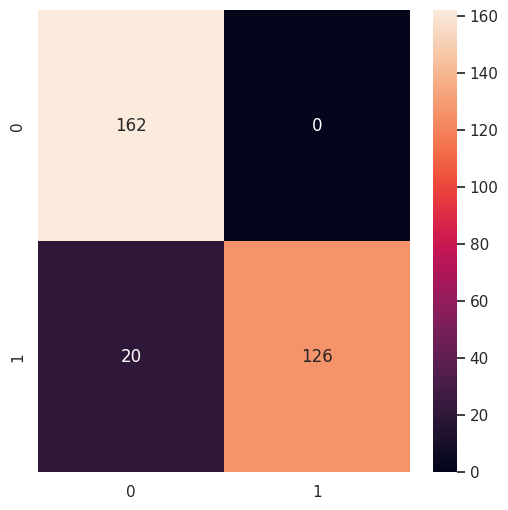

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, prediction)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, prediction)
print("Precision: ",precision)

Precision:  1.0


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, prediction)
print("Recall is: ",recall)

Recall is:  0.863013698630137


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.9264705882352942


In [ ]:
score_kn = round(accuracy_score(prediction,y_test)*100,2)

print("The accuracy score achieved using KNNeighbour is: "+str(score_kn)+" %")

The accuracy score achieved using KNNeighbour is: 93.51 %


In [ ]:
#decision tree

In [ ]:
for i in range(1,10):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy: 75.73%
Test accuracy: 76.62%
max_depth = 2
Train accuracy: 75.87%
Test accuracy: 74.68%
max_depth = 3
Train accuracy: 84.24%
Test accuracy: 82.79%
max_depth = 4
Train accuracy: 87.87%
Test accuracy: 82.79%
max_depth = 5
Train accuracy: 92.61%
Test accuracy: 87.99%
max_depth = 6
Train accuracy: 95.26%
Test accuracy: 91.23%
max_depth = 7
Train accuracy: 98.33%
Test accuracy: 95.45%
max_depth = 8
Train accuracy: 99.16%
Test accuracy: 97.40%
max_depth = 9
Train accuracy: 100.00%
Test accuracy: 98.70%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=0)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 1 1 1 1 0 1 0 1]


In [ ]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 87.99 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

Train accuracy: 100.00%
Test accuracy: 98.70%


<Axes: >

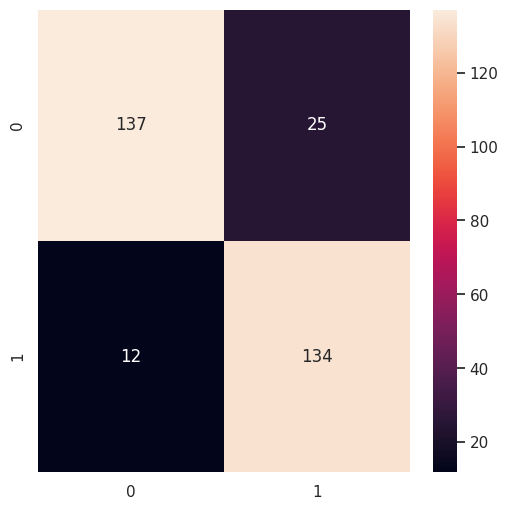

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_dt)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_dt)
print("Precision: ",precision)

Precision:  0.8427672955974843


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_dt)
print("Recall is: ",recall)

Recall is:  0.9178082191780822


In [ ]:
#f score
print((2*precision*recall)/(precision+recall))

0.878688524590164


In [ ]:
#random forest

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)

In [ ]:
rf = RandomForestClassifier(random_state = 42)

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred_rf = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", metrics.accuracy_score(y_test, y_pred_rf))
oldforest= accuracy_score(y_test, y_pred_rf)

In [ ]:
model = train_model(X_train, y_train, X_test, y_test,RandomForestClassifier)

Train accuracy: 100.00%
Test accuracy: 98.70%


In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 98.7 %


<Axes: >

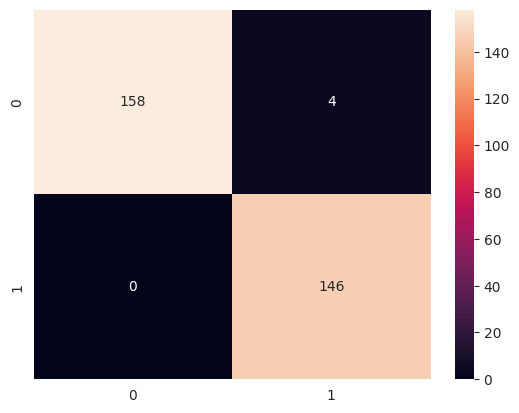

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test,y_pred_rf)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_rf)
print("Precision: ",precision)

Precision:  0.9733333333333334


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_rf)
print("Recall is: ",recall)

Recall is:  1.0


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.9864864864864865


In [ ]:
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=2), DecisionTreeClassifier(max_depth=5, random_state=2606), LogisticRegression(),
     RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
KNN,0.935065
Decision Trees,0.879870
Logistic Regression,0.831169
Random Forests,0.987013


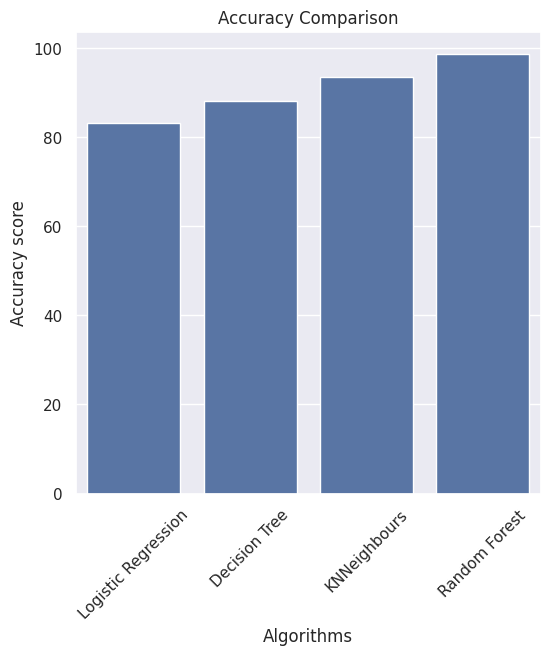

In [ ]:
scores = [score_lr,score_dt,score_kn,score_rf]
algorithms = ["Logistic Regression","Decision Tree","KNNeighbours","Random Forest"]
sns.set(rc={'figure.figsize':(6,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores,data=summary)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

data split- 80:20

In [ ]:
X_train20, X_test20, y_train20, y_test20 = train_test_split(X, Y, test_size=0.2, random_state=2606)
print ("train_set_x shape: " + str(X_train20.shape))
print ("train_set_y shape: " + str(y_train20.shape))
print ("test_set_x shape: " + str(X_test20.shape))
print ("test_set_y shape: " + str(y_test20.shape))

train_set_x shape: (820, 13)
train_set_y shape: (820,)
test_set_x shape: (205, 13)
test_set_y shape: (205,)


In [ ]:
def train_model(X_train20, y_train20, X_test20, y_test20, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train20,y_train20)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train20, y_train20)
    test_accuracy = model.score(X_test20, y_test20)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

In [ ]:
model = train_model(X_train20, y_train20, X_test20, y_test20, LogisticRegression)

Train accuracy: 83.90%
Test accuracy: 83.41%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train20, y_train20)

y_pred_lr20 = logreg.predict(X_test20)
print(y_pred_lr20)
score_lr20 = round(accuracy_score(y_pred_lr20,y_test20)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr20)+" %")

[1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1]
The accuracy score achieved using Logistic Regression is: 83.41 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test20, y_pred_lr20)
print("Precision: ",precision)

Precision:  0.7815126050420168


In [ ]:
# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test20, y_pred_lr20)
print("Recall is: ",recall)

Recall is:  0.9207920792079208


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.8454545454545455


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test20,y_pred_lr20))
print(classification_report(y_test20,y_pred_lr20))
print("Accuracy:",accuracy_score(y_test20, y_pred_lr20))

[[78 26]
 [ 8 93]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       104
           1       0.78      0.92      0.85       101

    accuracy                           0.83       205
   macro avg       0.84      0.84      0.83       205
weighted avg       0.85      0.83      0.83       205

Accuracy: 0.8341463414634146


<Axes: >

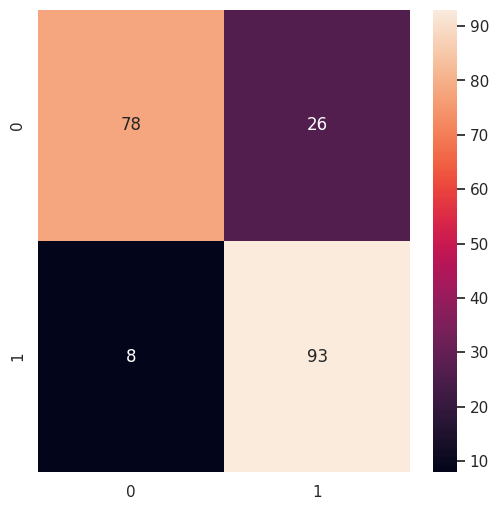

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test20, y_pred_lr20)
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#Knn

In [ ]:
model=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train20,y_train20)
prediction=model.predict(X_test20)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test20))

The accuracy of the KNN is 0.9609756097560975


In [ ]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 100.00%
n_neigbors = 2
Train accuracy: 98.61%
Test accuracy: 93.51%
n_neigbors = 3
Train accuracy: 97.21%
Test accuracy: 85.06%
n_neigbors = 4
Train accuracy: 90.79%
Test accuracy: 76.95%
n_neigbors = 5
Train accuracy: 86.75%
Test accuracy: 69.81%
n_neigbors = 6
Train accuracy: 79.50%
Test accuracy: 71.10%
n_neigbors = 7
Train accuracy: 78.52%
Test accuracy: 72.08%
n_neigbors = 8
Train accuracy: 78.10%
Test accuracy: 72.08%
n_neigbors = 9
Train accuracy: 78.94%
Test accuracy: 72.40%


<Axes: >

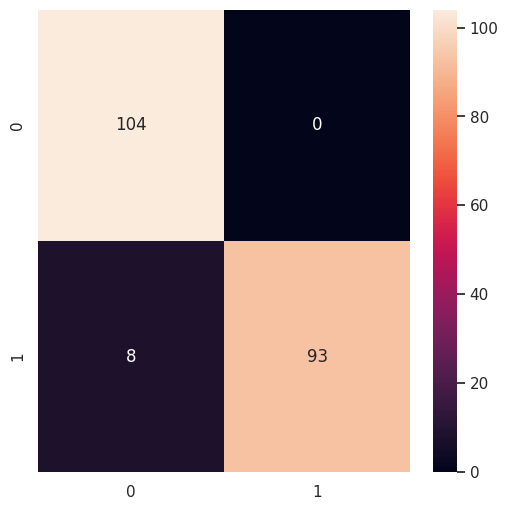

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test20, prediction)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test20, prediction)
print("Precision: ",precision)

Precision:  1.0


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test20, prediction)
print("Recall is: ",recall)

Recall is:  0.9207920792079208


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.9587628865979382


In [ ]:
score_kn20 = round(accuracy_score(prediction,y_test20)*100,2)

print("The accuracy score achieved using KNNeighbour is: "+str(score_kn20)+" %")

The accuracy score achieved using KNNeighbour is: 96.1 %


In [ ]:
#decision tree

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)


Train accuracy: 100.00%
Test accuracy: 98.70%


In [ ]:
for i in range(1,11):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy: 75.73%
Test accuracy: 76.62%
max_depth = 2
Train accuracy: 75.87%
Test accuracy: 74.68%
max_depth = 3
Train accuracy: 84.24%
Test accuracy: 82.79%
max_depth = 4
Train accuracy: 87.87%
Test accuracy: 82.79%
max_depth = 5
Train accuracy: 92.61%
Test accuracy: 87.99%
max_depth = 6
Train accuracy: 95.26%
Test accuracy: 91.23%
max_depth = 7
Train accuracy: 98.33%
Test accuracy: 95.45%
max_depth = 8
Train accuracy: 99.16%
Test accuracy: 97.40%
max_depth = 9
Train accuracy: 100.00%
Test accuracy: 98.70%
max_depth = 10
Train accuracy: 100.00%
Test accuracy: 98.70%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=0)

dt.fit(X_train20, y_train20)

y_pred_dt20 = dt.predict(X_test20)
print(y_pred_dt20)

[1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1]


In [ ]:
score_dt20 = round(accuracy_score(y_pred_dt20,y_test20)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt20)+" %")

The accuracy score achieved using Decision Tree is: 91.22 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = train_model(X_train20, y_train20, X_test20, y_test20, DecisionTreeClassifier)

Train accuracy: 100.00%
Test accuracy: 100.00%


<Axes: >

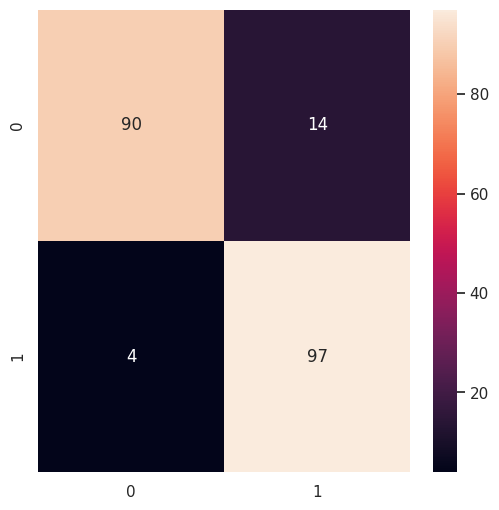

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test20, y_pred_dt20)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test20, y_pred_dt20)
print("Precision: ",precision)

Precision:  0.8738738738738738


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test20, y_pred_dt20)
print("Recall is: ",recall)

Recall is:  0.9603960396039604


In [ ]:
#f score
print((2*precision*recall)/(precision+recall))

0.9150943396226415


In [ ]:
#Random forest

In [ ]:
model = train_model(X_train20, y_train20, X_test20, y_test20, RandomForestClassifier, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 100.00%


In [ ]:
rf = RandomForestClassifier(random_state = 42)

# fitting the model
rf.fit(X_train20, y_train20)

# calculating the predictions
y_pred_rf20 = rf.predict(X_test20)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", metrics.accuracy_score(y_test20, y_pred_rf20))
oldforest= accuracy_score(y_test20, y_pred_rf20)

The test accuracy score of Random Forest is  1.0


In [ ]:
model = train_model(X_train20, y_train20, X_test20, y_test20,RandomForestClassifier)

Train accuracy: 100.00%
Test accuracy: 100.00%


In [ ]:
score_rf20 = round(accuracy_score(y_pred_rf20,y_test20)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf20)+" %")

The accuracy score achieved using Random forest is: 100.0 %


<Axes: >

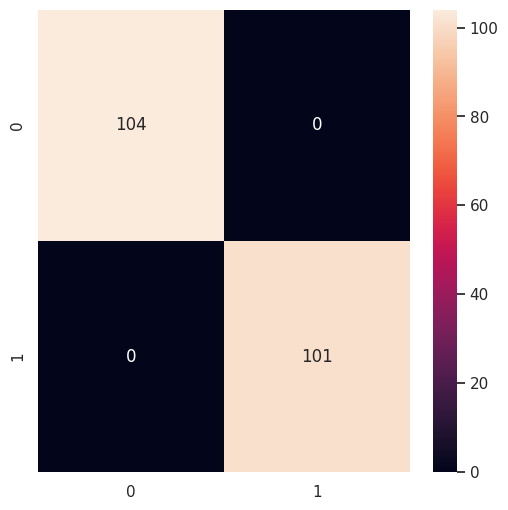

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test20,y_pred_rf20)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test20, y_pred_rf20)
print("Precision: ",precision)

Precision:  1.0


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test20, y_pred_rf20)
print("Recall is: ",recall)

Recall is:  1.0


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

1.0


In [ ]:
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=2), DecisionTreeClassifier(max_depth=5, random_state=2606), LogisticRegression(),
     RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train20, y_train20)
    score = model.score(X_test20, y_test20)
    accuracy.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
KNN,0.960976
Decision Trees,0.912195
Logistic Regression,0.834146
Random Forests,1.000000


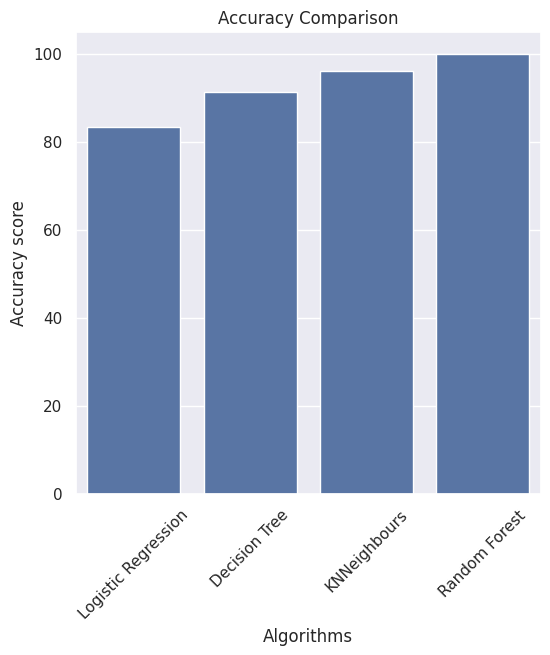

In [ ]:
scores = [score_lr20,score_dt20,score_kn20,score_rf20]
algorithms = ["Logistic Regression","Decision Tree","KNNeighbours","Random Forest"]
sns.set(rc={'figure.figsize':(6,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores,data=summary)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

data split- 60:40

In [ ]:
X_train40, X_test40, y_train40, y_test40 = train_test_split(X, Y, test_size=0.4, random_state=2606)
print ("train_set_x shape: " + str(X_train40.shape))
print ("train_set_y shape: " + str(y_train40.shape))
print ("test_set_x shape: " + str(X_test40.shape))
print ("test_set_y shape: " + str(y_test40.shape))

train_set_x shape: (615, 13)
train_set_y shape: (615,)
test_set_x shape: (410, 13)
test_set_y shape: (410,)


In [ ]:
def train_model(X_train40, y_train40, X_test40, y_test40, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train40,y_train40)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train40, y_train40)
    test_accuracy = model.score(X_test40, y_test40)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

In [ ]:
model = train_model(X_train40, y_train40, X_test40, y_test40, LogisticRegression)

Train accuracy: 86.50%
Test accuracy: 83.66%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train40, y_train40)

y_pred_lr40 = logreg.predict(X_test40)
print(y_pred_lr40)
score_lr40 = round(accuracy_score(y_pred_lr40,y_test40)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr40)+" %")

[1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1]
The accuracy score achieved using Logistic Regression is: 83.66 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test40, y_pred_lr40)
print("Precision: ",precision)

Precision:  0.7682403433476395


In [ ]:
# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test40, y_pred_lr40)
print("Recall is: ",recall)

Recall is:  0.9322916666666666


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.8423529411764705


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test40,y_pred_lr40))
print(classification_report(y_test40,y_pred_lr40))
print("Accuracy:",accuracy_score(y_test40, y_pred_lr40))

[[164  54]
 [ 13 179]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       218
           1       0.77      0.93      0.84       192

    accuracy                           0.84       410
   macro avg       0.85      0.84      0.84       410
weighted avg       0.85      0.84      0.84       410

Accuracy: 0.8365853658536585


<Axes: >

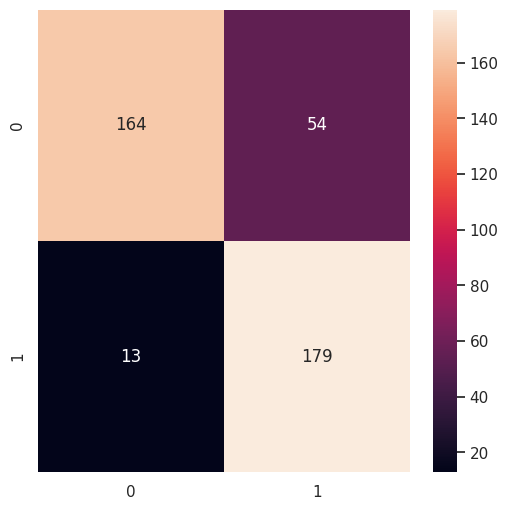

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test40, y_pred_lr40)
sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#Knn

In [ ]:
model = train_model(X_train40, y_train40, X_test40, y_test40, KNeighborsClassifier)

Train accuracy: 83.74%
Test accuracy: 70.00%


In [ ]:
model=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train40,y_train40)
prediction=model.predict(X_test40)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test40))

The accuracy of the KNN is 0.9170731707317074


In [ ]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train40, y_train40, X_test40, y_test40, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 97.80%
n_neigbors = 2
Train accuracy: 98.21%
Test accuracy: 91.71%
n_neigbors = 3
Train accuracy: 94.96%
Test accuracy: 79.02%
n_neigbors = 4
Train accuracy: 87.48%
Test accuracy: 73.41%
n_neigbors = 5
Train accuracy: 83.74%
Test accuracy: 70.00%
n_neigbors = 6
Train accuracy: 79.02%
Test accuracy: 72.44%
n_neigbors = 7
Train accuracy: 78.54%
Test accuracy: 71.95%
n_neigbors = 8
Train accuracy: 79.02%
Test accuracy: 70.00%
n_neigbors = 9
Train accuracy: 79.35%
Test accuracy: 70.98%


In [ ]:
model=KNeighborsClassifier(n_neighbors=2) #this examines 3 neighbours for putting the new data into a class
model.fit(X_train40,y_train40)
prediction=model.predict(X_test40)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test40))

The accuracy of the KNN is 0.9170731707317074


<Axes: >

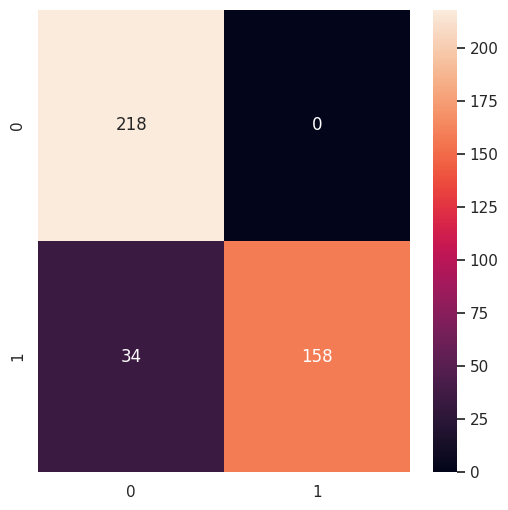

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test40, prediction)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test40, prediction)
print("Precision: ",precision)

Precision:  1.0


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test40, prediction)
print("Recall is: ",recall)

Recall is:  0.8229166666666666


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.9028571428571429


In [ ]:
score_kn40 = round(accuracy_score(prediction,y_test40)*100,2)

print("The accuracy score achieved using KNNeighbour is: "+str(score_kn40)+" %")

The accuracy score achieved using KNNeighbour is: 91.71 %


In [ ]:
#decision tree

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)


Train accuracy: 100.00%
Test accuracy: 98.70%


In [ ]:
for i in range(1,10):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606)

max_depth = 1
Train accuracy: 75.73%
Test accuracy: 76.62%
max_depth = 2
Train accuracy: 75.87%
Test accuracy: 74.68%
max_depth = 3
Train accuracy: 84.24%
Test accuracy: 82.79%
max_depth = 4
Train accuracy: 87.87%
Test accuracy: 82.79%
max_depth = 5
Train accuracy: 92.61%
Test accuracy: 87.99%
max_depth = 6
Train accuracy: 95.26%
Test accuracy: 91.23%
max_depth = 7
Train accuracy: 98.33%
Test accuracy: 95.45%
max_depth = 8
Train accuracy: 99.16%
Test accuracy: 97.40%
max_depth = 9
Train accuracy: 100.00%
Test accuracy: 98.70%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=0)

dt.fit(X_train40, y_train40)

y_pred_dt40 = dt.predict(X_test40)
print(y_pred_dt40)

[1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 1 1]


In [ ]:
score_dt40 = round(accuracy_score(y_pred_dt40,y_test40)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt40)+" %")

The accuracy score achieved using Decision Tree is: 88.29 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = train_model(X_train40, y_train40, X_test40, y_test40, DecisionTreeClassifier)

Train accuracy: 100.00%
Test accuracy: 95.37%


<Axes: >

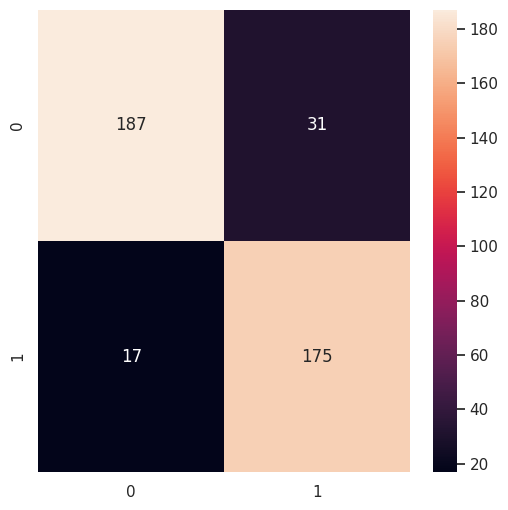

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test40, y_pred_dt40)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test40, y_pred_dt40)
print("Precision: ",precision)

Precision:  0.8495145631067961


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test40, y_pred_dt40)
print("Recall is: ",recall)

Recall is:  0.9114583333333334


In [ ]:
#f score
print((2*precision*recall)/(precision+recall))

0.8793969849246231


Random Forest

In [ ]:
model = train_model(X_train40, y_train40, X_test40, y_test40, RandomForestClassifier, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 98.29%


In [ ]:
rf = RandomForestClassifier(random_state = 42)

# fitting the model
rf.fit(X_train40, y_train40)

# calculating the predictions
y_pred_rf40 = rf.predict(X_test40)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", metrics.accuracy_score(y_test40, y_pred_rf40))
oldforest= accuracy_score(y_test40, y_pred_rf40)

The test accuracy score of Random Forest is  0.9829268292682927


In [ ]:
model = train_model(X_train40, y_train40, X_test40, y_test40,RandomForestClassifier)

Train accuracy: 100.00%
Test accuracy: 98.29%


In [ ]:
score_rf40 = round(accuracy_score(y_pred_rf40,y_test40)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf40)+" %")

The accuracy score achieved using Random forest is: 98.29 %


<Axes: >

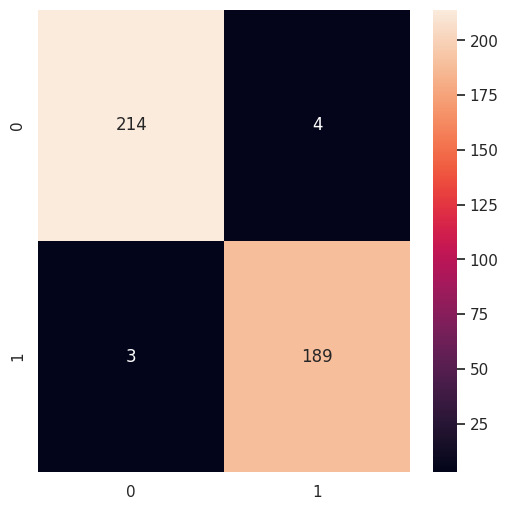

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test40,y_pred_rf40)

sns.heatmap(matrix,annot = True, fmt = "d")

In [ ]:
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test40, y_pred_rf40)
print("Precision: ",precision)

Precision:  0.9792746113989638


In [ ]:
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test40, y_pred_rf40)
print("Recall is: ",recall)

Recall is:  0.984375


In [ ]:
#F score
print((2*precision*recall)/(precision+recall))

0.9818181818181819


In [ ]:
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=2), DecisionTreeClassifier(max_depth=5, random_state=2606), LogisticRegression(),
     RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train40, y_train40)
    score = model.score(X_test40, y_test40)
    accuracy.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
KNN,0.917073
Decision Trees,0.882927
Logistic Regression,0.836585
Random Forests,0.975610


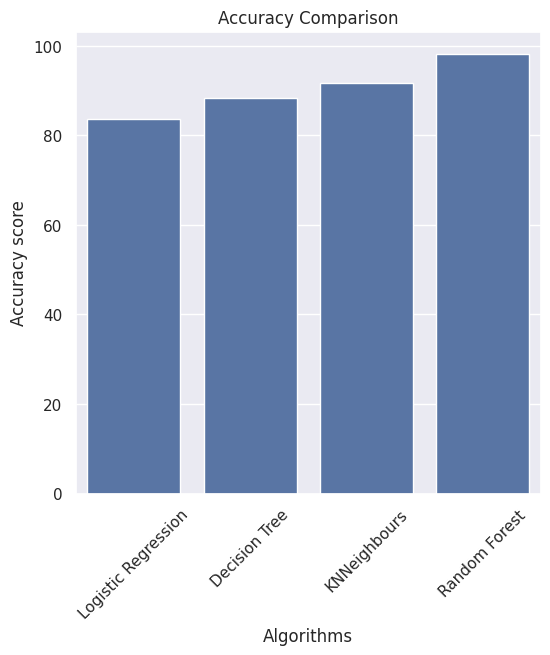

In [ ]:
scores = [score_lr40,score_dt40,score_kn40,score_rf40]
algorithms = ["Logistic Regression","Decision Tree","KNNeighbours","Random Forest"]
sns.set(rc={'figure.figsize':(6,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores,data=summary)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

Final Evaluation

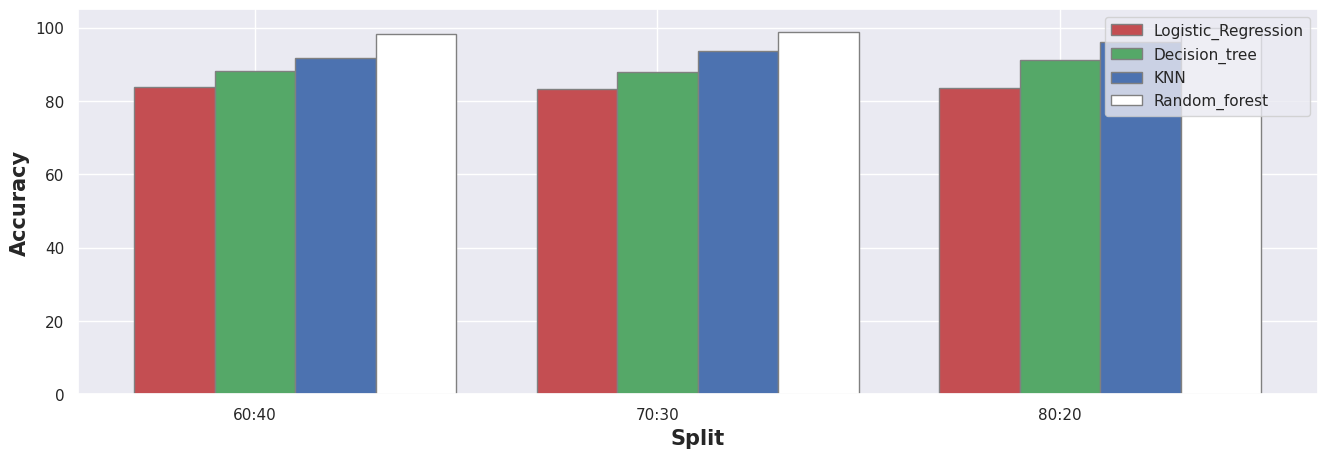

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(16, 5))

# set height of bar
Logistic_Regression= [score_lr40,score_lr, score_lr20]
Decision_tree = [score_dt40,score_dt, score_dt20]
KNN = [score_kn40,score_kn,score_kn20]
Random_forest = [score_rf40,score_rf,score_rf20]

# Set position of bar on X axis
br1 = np.arange(len(Logistic_Regression))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
# Make the plot
plt.bar(br1, Logistic_Regression, color ='r', width = barWidth,
        edgecolor ='grey', label ='Logistic_Regression')
plt.bar(br2, Decision_tree, color ='g', width = barWidth,
        edgecolor ='grey', label ='Decision_tree')
plt.bar(br3, KNN, color ='b', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br4, Random_forest, color ='w', width = barWidth,
        edgecolor ='grey', label ='Random_forest')

# Adding Xticks
plt.xlabel('Split', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Logistic_Regression))],
        ['60:40', '70:30', '80:20'])

plt.legend()
plt.show()

Result Comparison

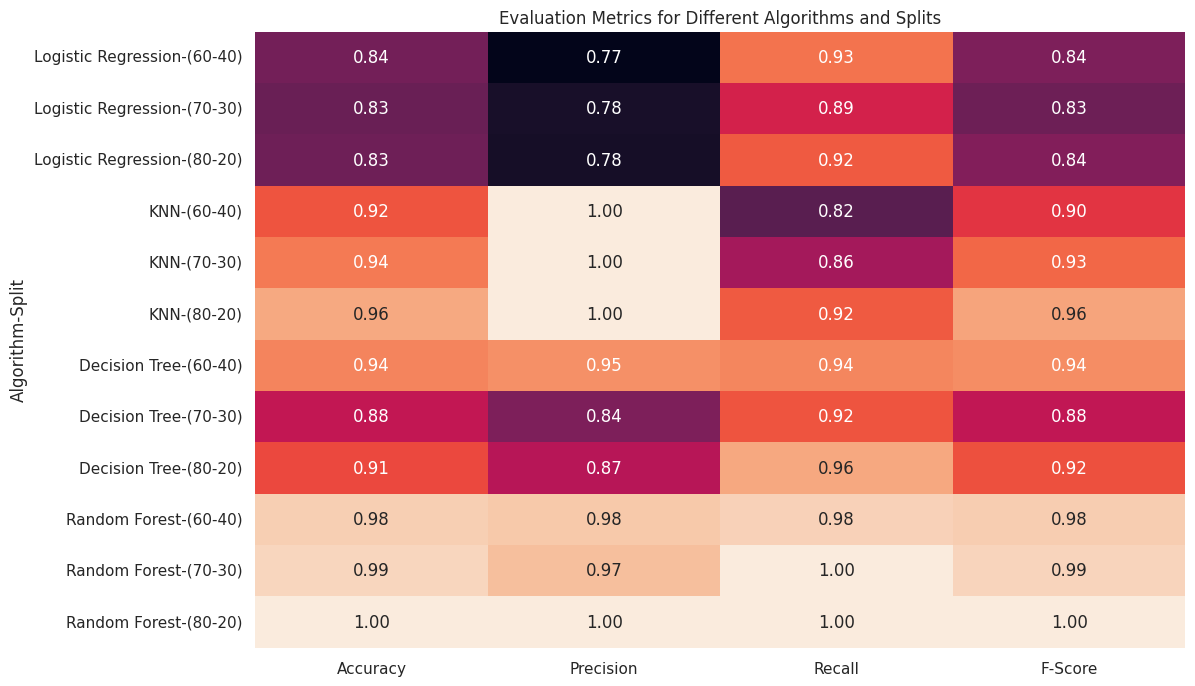

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated data with different splits
data_splits = {
    "Algorithm": ["Logistic Regression"] * 3 + ["KNN"] * 3 + ["Decision Tree"] * 3 + ["Random Forest"] * 3,
    "Split": ["(60-40)", "(70-30)", "(80-20)"] * 4,
    "Accuracy": [0.836, 0.831, 0.834, 0.917,0.935, 0.961, 0.941 , 0.879, 0.912, 0.982, 0.987, 1.000],
    "Precision": [ 0.768, 0.783, 0.781,1.000, 1.000, 1.000,  0.947, 0.842, 0.873,  0.979, 0.973, 1.000],
    "Recall": [0.932, 0.890, 0.920, 0.822, 0.863, 0.920,  0.942,  0.917, 0.960,  0.984,  1.0, 1.000],
"F-Score": [0.842, 0.833, 0.845, 0.902, 0.926, 0.958, 0.945, 0.878, 0.915, 0.981, 0.986, 1.000],}

# Create a DataFrame
df_splits = pd.DataFrame(data_splits)

# Set the Algorithm and Split columns as the index
df_splits.set_index(["Algorithm", "Split"], inplace=True)

# Plot the table
plt.figure(figsize=(12, 8))
sns.heatmap(df_splits, annot=True, cbar=False, fmt=".2f")

# Title
plt.title("Evaluation Metrics for Different Algorithms and Splits")

# Display the plot
plt.show()

In [ ]:
#prediction

In [ ]:
input_data = (19,1,0,120,125,0,0,100,0,1,0,0,0)
# Converting the input data into an array
model=RandomForestClassifier()
model.fit(X_train,y_train)
input_data_as_np_array= np.asarray(input_data)
#Reshaping the numpy array to predict for only one instance
input_data_reshaped=input_data_as_np_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
if (prediction[0]==0):
  print('The person does not have any Heart Disease')
else:
  print('The person has a Heart Disease')

model


The person has a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier()